In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

dating_data = pd.read_csv("Speed Dating Data.csv",
                         encoding="ISO-8859-1")
print(dating_data.shape)

(8378, 195)


From the Data Documentation, Waves 1-4, 10, 11, and 15-17 had the most common design, which had no variations in the pool of individuals, conditioning, and had the same preference scale, so we will filter the data to just those waves to find the significant correlations among the numerical columns to match.

As well, we will drop columns with more than 10% of entries missing, since we have no shortage of column and we will want to avoid columns with broad, systemic missing data

In [4]:
## waves with the most common experiment design
exp_waves = [1, 2, 3, 4, 10, 11, 15, 16, 17]

## filtering to data only from most common design waves
dating_df = dating_data.loc[dating_data.wave.isin(exp_waves)].copy()

## removing columns that are not relevant to these waves (i.e. all missing values in the filtered data)
dating_df = dating_df.dropna(axis=1, how='all')

## dropping columns that have more than 10% of entries missing
reduced_dating_df = dating_df.dropna(axis=1, thresh=math.floor(dating_df.shape[0]*0.9))
print(reduced_dating_df.shape)

(3760, 89)


Let's take a look now at the correlations among the numeric columns

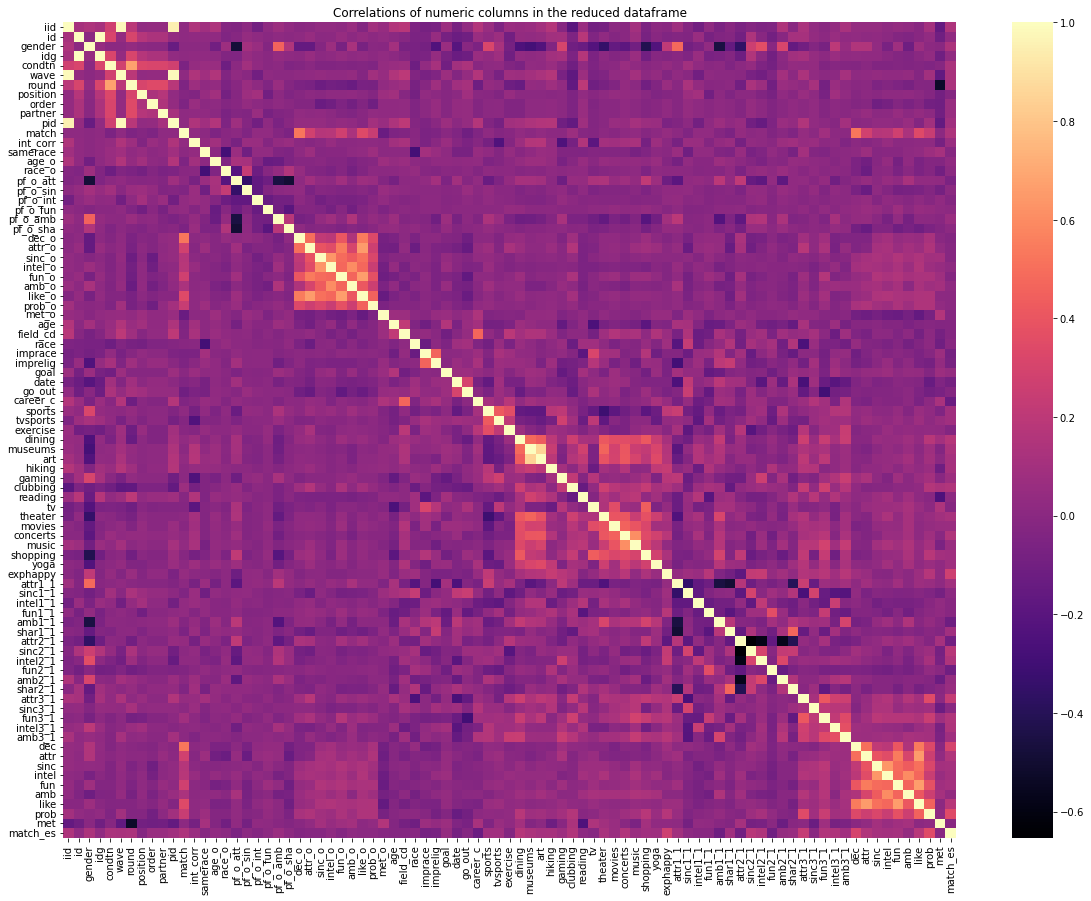

In [5]:
reduced_dating_df_numeric = reduced_dating_df.select_dtypes(np.number)

plt.figure(figsize=(20, 15))

## using Spearman correlation measure, since we've already seen non-normally distributed numeric data
corr = reduced_dating_df_numeric.corr(method='spearman')

sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap='magma')
plt.title("Correlations of numeric columns in the reduced dataframe");

Now let's find the statistically significant correlations to match (setting $\alpha = 0.005$)

In [7]:
from scipy.stats import spearmanr

## list of significantly correlated columns, dropping missing values row-wise
sig_corr_columns = [col for col in corr.index 
                    if (spearmanr(reduced_dating_df.dropna(subset=['match', col]).match.values,
                                reduced_dating_df.dropna(subset=['match', col])[col].values)[1] <= 0.005)]
sig_corr_df = corr.loc[sig_corr_columns][sig_corr_columns]
print(f"Number of statistically significant columns: {sig_corr_df.shape[0]}")

Number of statistically significant columns: 31


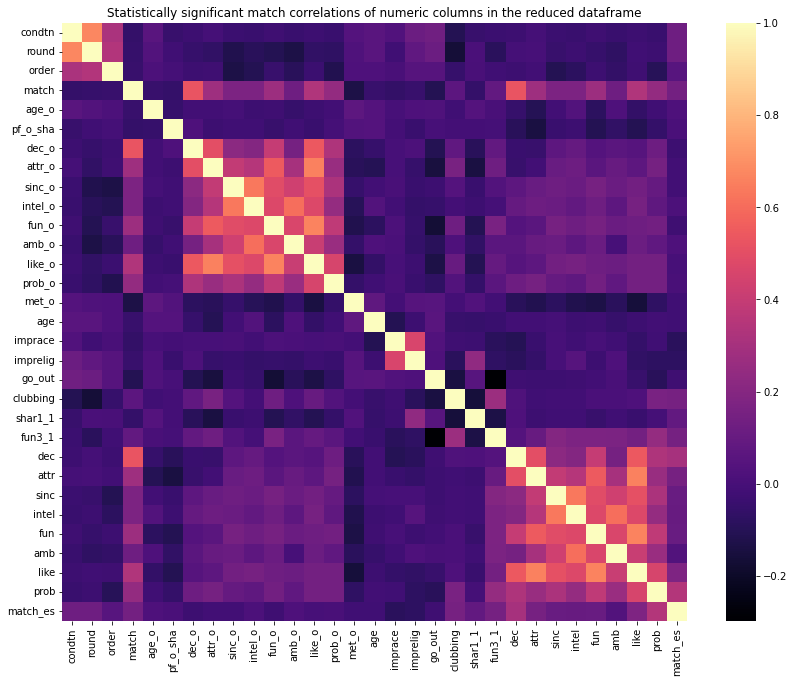

In [33]:
plt.figure(figsize=(14, 11))

sns.heatmap(sig_corr_df,
           xticklabels=sig_corr_df.columns.values,
           yticklabels=sig_corr_df.columns.values,
           cmap='magma')
plt.title("Statistically significant match correlations of numeric columns in the reduced dataframe")
plt.savefig('StatSigMatchCorr.png');

In [28]:
## dict of p-values of the correlations of numeric columns with match that aren't deterministically determinining match
col_corr_ps = {col: spearmanr(reduced_dating_df.dropna(subset=['match', col]).match.values,
                                reduced_dating_df.dropna(subset=['match', col])[col].values)[1]
            for col in corr.index
            if col not in ['dec', 'dec_o', 'match']}

## sorting col_corr_ps
sorted_corr_ps = sorted(col_corrs.items(), key=lambda x: x[1], reverse=False)

In [35]:
for col, p_val in sorted_corr_ps[:10]:
    print(f"Column {col} has p-value of {p_val} for its correlation with match")

Column like_o has p-value of 6.052124945417944e-98 for its correlation with match
Column like has p-value of 6.052124945417944e-98 for its correlation with match
Column attr_o has p-value of 1.3113466644333324e-67 for its correlation with match
Column attr has p-value of 1.3549196799653317e-67 for its correlation with match
Column fun has p-value of 3.177733547546301e-64 for its correlation with match
Column fun_o has p-value of 3.2607568222069186e-64 for its correlation with match
Column prob_o has p-value of 2.3844382633477745e-50 for its correlation with match
Column prob has p-value of 2.3844382633477745e-50 for its correlation with match
Column intel_o has p-value of 3.0555703358047247e-26 for its correlation with match
Column intel has p-value of 3.0555703358047247e-26 for its correlation with match
